<a href="https://colab.research.google.com/github/Gareth11-max/Retail-Sales-Forecasting-Using-Regression-Techniques/blob/main/ML_MID_COURSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: The goal  is to predict sales based on certain features, such as the day of the week, whether the store is open, promotions, holidays, etc. This problem would typically be treated as a supervised regression problem, where the target variable is the Sales column.

Business Objective: Maximize sales prediction accuracy to improve planning, resource allocation, and marketing strategies.

Evaluation Metrics: Since you are predicting continuous values, the relevant metrics could include Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R² score for model evaluation.

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For handling missing data and imputation
from sklearn.impute import SimpleImputer

# For time series analysis (if applicable)
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# For date handling
import datetime

# Optional: For using advanced machine learning models
import xgboost as xgb
import lightgbm as lgb


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
df=pd.read_csv("/content/Rossmann Stores Data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


df['Store'] = df['Store'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Sales'] = df['Sales'].astype(float)
df['Customers'] = df['Customers'].astype(int)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6
df['Quarter'] = df['Date'].dt.quarter



scaler = StandardScaler()

Q1 = df[['Sales', 'Customers']].quantile(0.25)
Q3 = df[['Sales', 'Customers']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Sales', 'Customers']] < (Q1 - 1.5 * IQR)) | (df[['Sales', 'Customers']] > (Q3 + 1.5 * IQR)))
df = df[~outliers.any(axis=1)]

df.head()


Store            0
DayOfWeek        1
Date             1
Sales            1
Customers        1
Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Quarter
0,1,5,2015-07-31,5263.0,555,1.0,1.0,0,1.0,2015.0,7.0,31.0,4.0,3.0
1,2,5,2015-07-31,6064.0,625,1.0,1.0,0,1.0,2015.0,7.0,31.0,4.0,3.0
2,3,5,2015-07-31,8314.0,821,1.0,1.0,0,1.0,2015.0,7.0,31.0,4.0,3.0
4,5,5,2015-07-31,4822.0,559,1.0,1.0,0,1.0,2015.0,7.0,31.0,4.0,3.0
5,6,5,2015-07-31,5651.0,589,1.0,1.0,0,1.0,2015.0,7.0,31.0,4.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Sales']])


In [ ]:
print(df.describe())

              Store     DayOfWeek                           Date  \
count  80017.000000  80017.000000                          80016   
mean     555.829824      3.982766  2015-06-23 21:37:22.711457536   
min        1.000000      1.000000            2015-05-17 00:00:00   
25%      272.000000      2.000000            2015-06-05 00:00:00   
50%      557.000000      4.000000            2015-06-24 00:00:00   
75%      840.000000      6.000000            2015-07-13 00:00:00   
max     1115.000000      7.000000            2015-07-31 00:00:00   
std      324.533064      1.984554                            NaN   

              Sales     Customers          Open         Promo  SchoolHoliday  \
count  80017.000000  80017.000000  80017.000000  80017.000000   80017.000000   
mean    5651.828999    575.333467      0.838547      0.388005       0.192622   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%     3991.000000    416.000000      1.000000      0.000000      

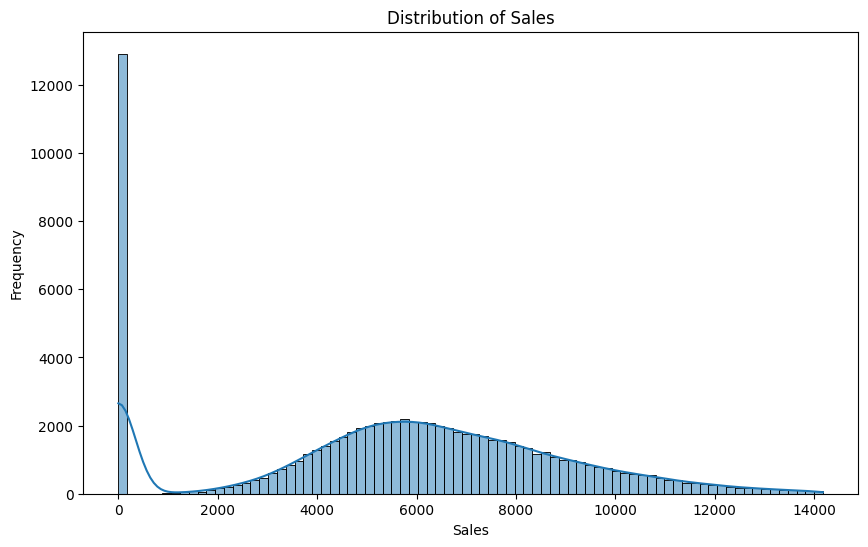

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


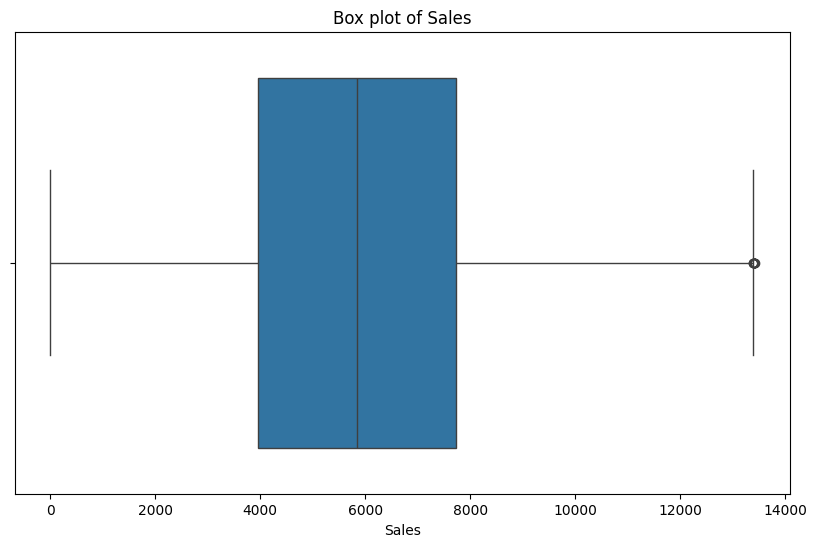

In [ ]:
# Box plot for 'Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box plot of Sales')
plt.show()


**Bivariate Analysis**

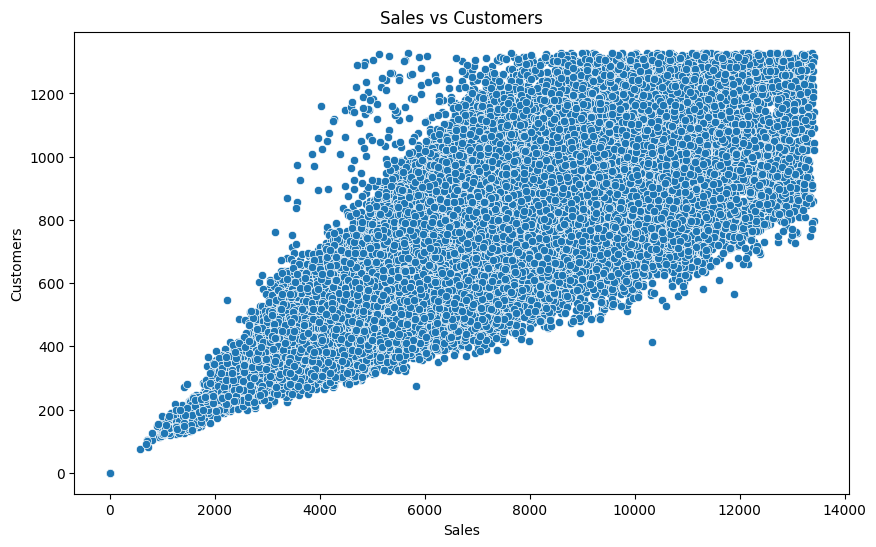

In [ ]:
# Scatter plot for 'Sales' vs 'Customers'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales'], y=df['Customers'])
plt.title('Sales vs Customers')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.show()


**Multivariate Analysis**

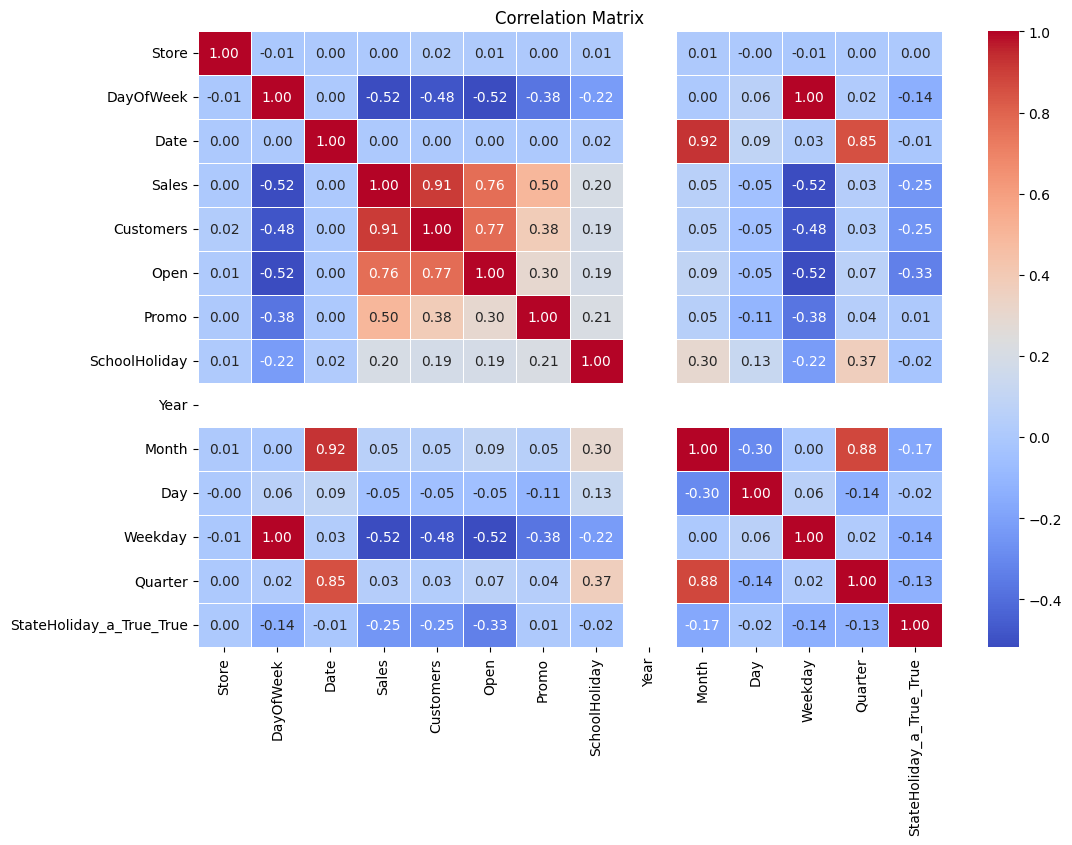

In [ ]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



**Temporal Analysis**

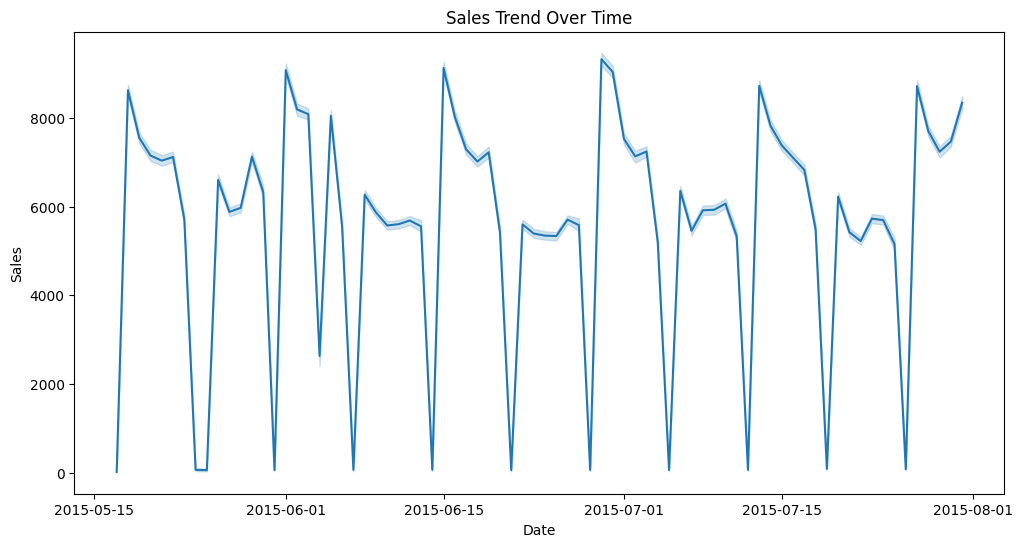

In [ ]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plot Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'], y=df['Sales'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


**Categorical Data Analysis**

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'StateHoliday_a_True_True'],
      dtype='object')

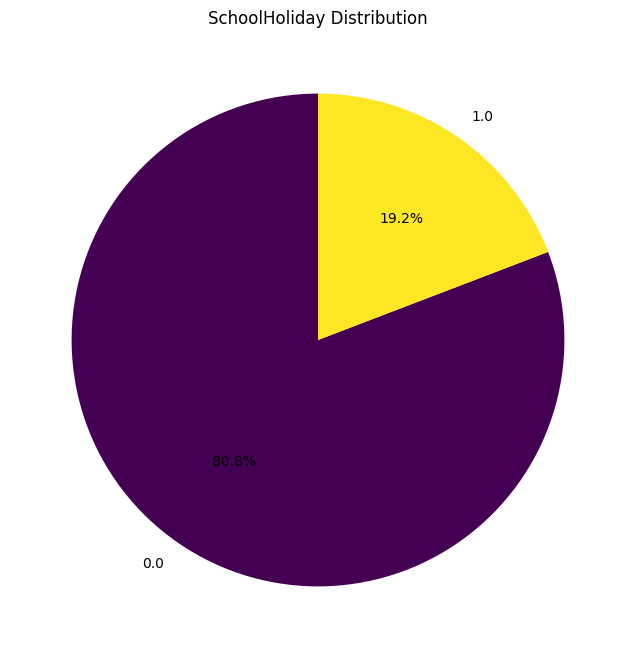

In [ ]:
# Pie chart for the 'StateHoliday' variable
schoolholiday_counts = df['SchoolHoliday'].value_counts()
plt.figure(figsize=(8, 8))
schoolholiday_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('SchoolHoliday Distribution')
plt.ylabel('')
plt.show()


**PCA (Principal Component Analysis)**

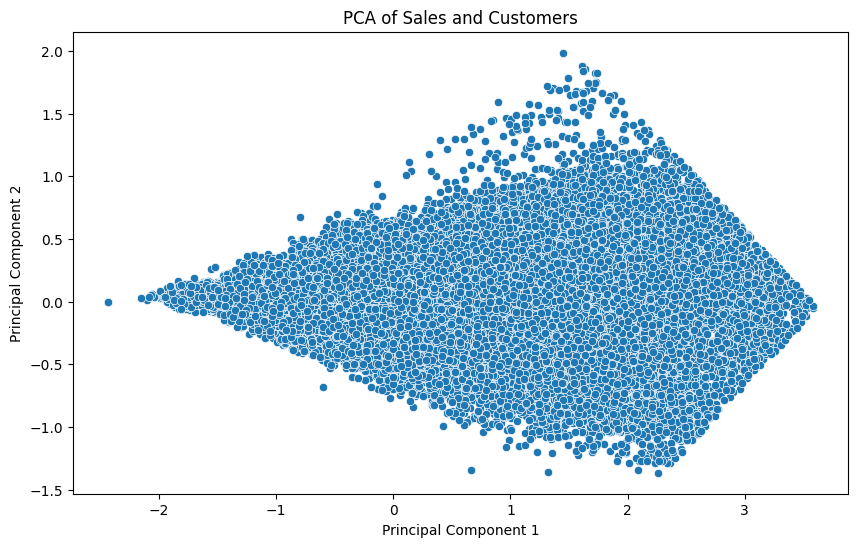

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Sales', 'Customers']])  # Use relevant columns

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame from the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Plot the results of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.title('PCA of Sales and Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**t-test**

In [ ]:
from scipy.stats import ttest_ind

# Assume 'StateHoliday' is the group variable (0=non-holiday, 1=holiday)
group_0 = df[df['SchoolHoliday'] == 0]['Sales']
group_1 = df[df['SchoolHoliday'] == 1]['Sales']

# Perform t-test
t_stat, p_value = ttest_ind(group_0, group_1)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -57.07708609440575, p-value: 0.0


**Chi-Square Test**

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['SchoolHoliday'], df['Open'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")


Chi2 Stat: 2854.5016463894276, p-value: 0.0


**K-Means Clustering**


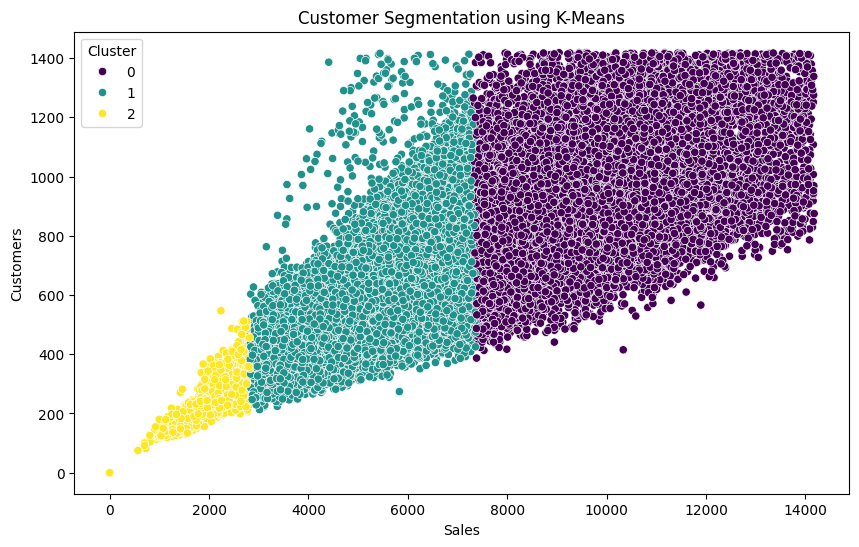

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X_segmentation = df[['Sales', 'Customers']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_segmentation)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales'], y=df['Customers'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.show()


**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with features 'X' and target 'y'
X = df.drop('Date', axis=1)
y = df['Sales']

# 80:20 Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Random Forest Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification (or RandomForestRegressor for regression)

# Assuming df is already defined with necessary features and target variable
# Ensure that 'Sales' is numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Convert 'Date' to datetime (if not already done)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract features from 'Date' (Year, Month, Day, Weekday)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Features (X) and target (y)
X = df[['Year', 'Month', 'Day', 'Weekday']]
y = df['Sales']

# Check if any column contains non-numeric values
print(X.dtypes)  # Ensure all columns are numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier (or RandomForestRegressor if performing regression)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)



Year       float64
Month      float64
Day        float64
Weekday    float64
dtype: object


RandomForestClassifier(random_state=42)

**Parallelization**

In [ ]:
# Example: Using n_jobs for parallelism in Random Forest
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


**Saving and loading model**

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('random_forest_model.pkl')


**Scikit-learn Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


**Automated Machine Learning (AutoML)**

In [ ]:
from tpot import TPOTClassifier

# Create an AutoML pipeline using TPOT
tpot = TPOTClassifier(epochs=10, random_state=42)
tpot.fit(X_train, y_train)

# Get the best model
tpot.export('best_model.py')
